In [1]:
import attention as attn

import numpy as np
import jax
import jax.numpy as jnp
import jax.random as jr

import matplotlib.pyplot as plt

In [2]:
class MHA:
    def __init__(self, emb, h, d):
        self.emb = emb
        self.h = h
        self.d = d
        self.L = len(self.h)

        self.var_q = 1
        self.var_k = 1
        self.var_v = 1
        self.var_o = 1

        self.queries = []
        self.keys = []
        self.values = []
        self.outputs = []

    def init_weights(self, key):
        keys = jr.split(key, self.L)
        for i in range(self.L):
            layer_keys = jr.split(keys[i], 3)
            
            if i == 0:
                d_prev = self.emb
            else:
                d_prev = self.d[i-1]
            h = self.h[i]
            d = self.d[i]

            self.queries.append(jr.normal(layer_keys[0], (h, d_prev, d)) * jnp.sqrt(self.var_q/jnp.sqrt(d)))
            self.keys.append(jr.normal(layer_keys[1], (h, d_prev, d)) * jnp.sqrt(self.var_k/jnp.sqrt(d)))
            self.values.append(jr.normal(layer_keys[2], (h, d_prev, d)) * jnp.sqrt(self.var_v/jnp.sqrt(d)))
            self.outputs.append(jr.normal(layer_keys[3], (h*d, d)) * jnp.sqrt(self.var_o/jnp.sqrt(d)))

    def forward(self, x):
        for i in range(self.L):
            q = self.queries[i]
            k = self.keys[i]
            v = self.values[i]
            o = self.outputs[i]
            x = attn.mha(x, q, k, v, o, attn.identity)
        return x
        

In [3]:
# rng key
key = jr.PRNGKey(0)

In [23]:
emb = 100 # token embedding dimension
s = 10 # sequence length
d = [1000, 1000, 1000]
h = [100, 100, 100]

mha = MHA(emb, h, d)
mha.var_q = 0.002
mha.var_k = 0.002
mha.var_v = 0.002
mha.var_o = 0.002

mha.init_weights(key)
x = jr.normal(key, (1, s, emb))
y = mha.forward(x)

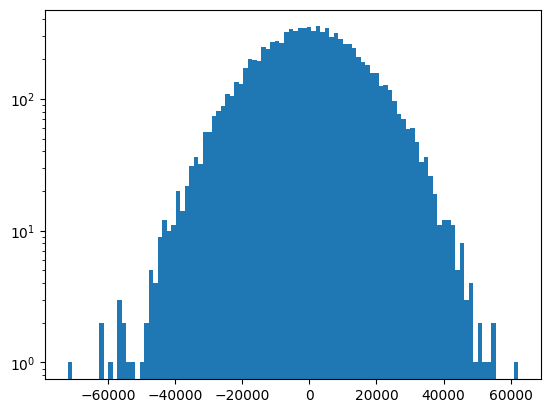

In [24]:
# plot histogram of y
plt.hist(y.flatten(), bins=100)
# log scale
plt.yscale('log')
plt.show()